In [1]:
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [2]:
# urlav = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/Avalon.csv"
# avalon = pd.read_csv(urlav)

# urlmor = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/Morgan.csv"
# morgan = pd.read_csv(urlmor)

urlmac = "https://raw.githubusercontent.com/olagit/Structure-vs-properties-of-compounds/main/data/maccs.csv"
maccs = pd.read_csv(urlmac)

In [3]:
maccs.head()

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp157,fp158,fp159,fp160,fp161,fp162,fp163,fp164,fp165,fp166
0,0,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,1,0
1,1,-3.30,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
2,2,-2.06,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,3,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,4,-1.33,c1ccsc1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [54]:
mcsl = maccs[maccs['logP'] < -5]
mcsl

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp163,fp164,fp165,fp166,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe,Agglomerative
3,3,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,1,0,1,0,0,0,5,8,5,0
6,6,-7.320,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl,0,0,0,0,0,0,0,...,1,0,1,0,0,0,2,7,2,22
7,7,-5.030,CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O,0,0,0,0,0,0,0,...,1,1,1,0,2,2,1,6,3,0
8,8,-6.290,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,9,2,23
14,14,-7.960,CCCCCCCCCCCCCC,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,1054,-5.850,Cc1cccc2c1ccc3ccccc32,0,0,0,0,0,0,0,...,1,0,1,0,0,0,3,5,3,0
1097,1097,-8.172,CCCCCCCCCCCCCCCCCCCC,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18,0,21
1111,1111,-5.190,O=C1c2ccccc2C(=O)c3ccccc13,0,0,0,0,0,0,0,...,1,1,1,0,0,2,2,4,2,17
1116,1116,-6.237,COP(=S)(OC)Oc1ccc(Sc2ccc(OP(=S)(OC)OC)cc2)cc1,0,0,0,0,0,0,0,...,1,1,1,0,0,6,2,2,2,5


In [4]:
maccs.shape

(1128, 170)

In [5]:
maccs_fps = maccs.iloc[:,3:515].values

maccs_logps = maccs.iloc[:,1].values

maccs_logps_fps = maccs.drop(['index', 'smiles'], axis=1)

In [6]:
maccs_fps.shape

(1128, 167)

In [7]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig

In [8]:
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [9]:
import numpy as np

maccs['Donor'] = np.zeros(maccs.shape[0], dtype=int)
maccs['Acceptor'] = np.zeros(maccs.shape[0], dtype=int)
maccs['Aromatic'] = np.zeros(maccs.shape[0], dtype=int)
maccs['Hydrophobe'] = np.zeros(maccs.shape[0], dtype=int)
maccs['LumpedHydrophobe'] = np.zeros(maccs.shape[0], dtype=int)

In [10]:
for i in range(maccs.shape[0]):
    m = Chem.MolFromSmiles(maccs['smiles'][i])
    feats = factory.GetFeaturesForMol(m)
    if feats:
        for j in range(len(feats)):
            if feats[j].GetFamily() == 'Donor':
                maccs.loc[i, 'Donor'] += 1
            elif feats[j].GetFamily() == 'Acceptor':
                maccs.loc[i, 'Acceptor'] += 1
            elif feats[j].GetFamily() == 'Aromatic':
                maccs.loc[i, 'Aromatic'] += 1
            elif feats[j].GetFamily() == 'Hydrophobe':
                maccs.loc[i, 'Hydrophobe'] += 1
            elif feats[j].GetFamily() == 'LumpedHydrophobe':
                maccs.loc[i, 'LumpedHydrophobe'] += 1
                
maccs.head()

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp162,fp163,fp164,fp165,fp166,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe
0,0,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,0,0,0,0,0,0,...,1,1,1,1,0,7,11,1,1,1
1,1,-3.30,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,2,1,1
2,2,-2.06,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,6,0
3,3,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,5,8,5
4,4,-1.33,c1ccsc1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1


In [11]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard

res = 1 - pdist(maccs_fps, 'jaccard')
squareform(res)
maccs_distance = pd.DataFrame(squareform(res), index=maccs.index, columns= maccs.index)

maccs_distance

,0,1,2,3,4,5,6,7,8,9,...,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127
0,0.000000,0.215686,0.040816,0.102564,0.075000,0.125000,0.116279,0.307692,0.200000,0.433962,...,0.186047,0.000000,0.116279,0.157895,0.111111,0.000000,0.132353,0.120690,0.023810,0.203704
1,0.215686,0.000000,0.078947,0.137931,0.178571,0.257143,0.187500,0.208333,0.190476,0.320000,...,0.108108,0.032258,0.187500,0.214286,0.282051,0.000000,0.240741,0.057692,0.031250,0.195652
2,0.040816,0.078947,0.000000,0.000000,0.000000,0.000000,0.000000,0.175000,0.083333,0.195652,...,0.428571,0.235294,0.000000,0.000000,0.054054,0.000000,0.120000,0.257143,0.375000,0.128205
3,0.102564,0.137931,0.000000,0.000000,0.166667,0.315789,0.357143,0.181818,0.192308,0.175000,...,0.000000,0.000000,0.357143,0.250000,0.107143,0.000000,0.000000,0.000000,0.000000,0.090909
4,0.075000,0.178571,0.000000,0.166667,0.000000,0.388889,0.117647,0.083333,0.107143,0.119048,...,0.000000,0.000000,0.117647,0.153846,0.068966,0.000000,0.021277,0.028571,0.000000,0.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500,0.026316,0.148148,0.000000,...,0.000000,0.083333,0.187500,0.000000,0.000000,0.000000,0.021277,0.058824,0.000000,0.161290
1124,0.132353,0.240741,0.120000,0.000000,0.021277,0.092593,0.000000,0.057971,0.031746,0.157143,...,0.217391,0.093023,0.000000,0.042553,0.274510,0.021277,0.000000,0.272727,0.090909,0.206897
1125,0.120690,0.057692,0.257143,0.000000,0.028571,0.044444,0.000000,0.196078,0.060000,0.169492,...,0.294118,0.129032,0.000000,0.000000,0.152174,0.058824,0.272727,0.000000,0.161290,0.318182
1126,0.023810,0.031250,0.375000,0.000000,0.000000,0.000000,0.000000,0.054054,0.000000,0.068182,...,0.375000,0.444444,0.000000,0.000000,0.033333,0.000000,0.090909,0.161290,0.000000,0.058824


In [12]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(affinity='precomputed', n_clusters=30, linkage='complete').fit(maccs_distance)
print(model.labels_)

[ 0  2  0 ... 17 11 10]


In [13]:
maccs['Agglomerative'] = model.labels_
maccs

,index,logP,smiles,fp0,fp1,fp2,fp3,fp4,fp5,fp6,...,fp163,fp164,fp165,fp166,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe,Agglomerative
0,0,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,0,0,0,0,0,0,0,...,1,1,1,0,7,11,1,1,1,0
1,1,-3.300,Cc1occc1C(=O)Nc2ccccc2,0,0,0,0,0,0,0,...,1,1,1,0,1,1,2,1,1,2
2,2,-2.060,CC(C)=CCCC(C)=CC(=O),0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,6,0,0
3,3,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0,0,0,0,0,0,0,...,1,0,1,0,0,0,5,8,5,0
4,4,-1.330,c1ccsc1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,-1.710,FC(F)(F)C(Cl)Br,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1124,1124,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,0,0,0,0,0,0,0,...,0,1,0,0,2,3,0,0,0,3
1125,1125,-3.091,CCSCCSP(=S)(OC)OC,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,3,0,17
1126,1126,-3.180,CCC(C)C,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,11


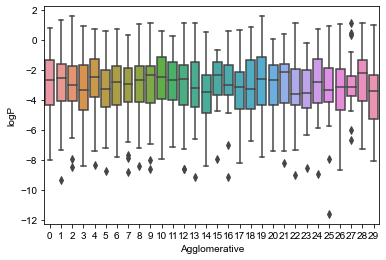

In [14]:
import seaborn as sns

sns.boxplot(x=maccs['Agglomerative'], y=maccs['logP'], data=maccs)
sns.set(rc={'figure.figsize':(19,9)})

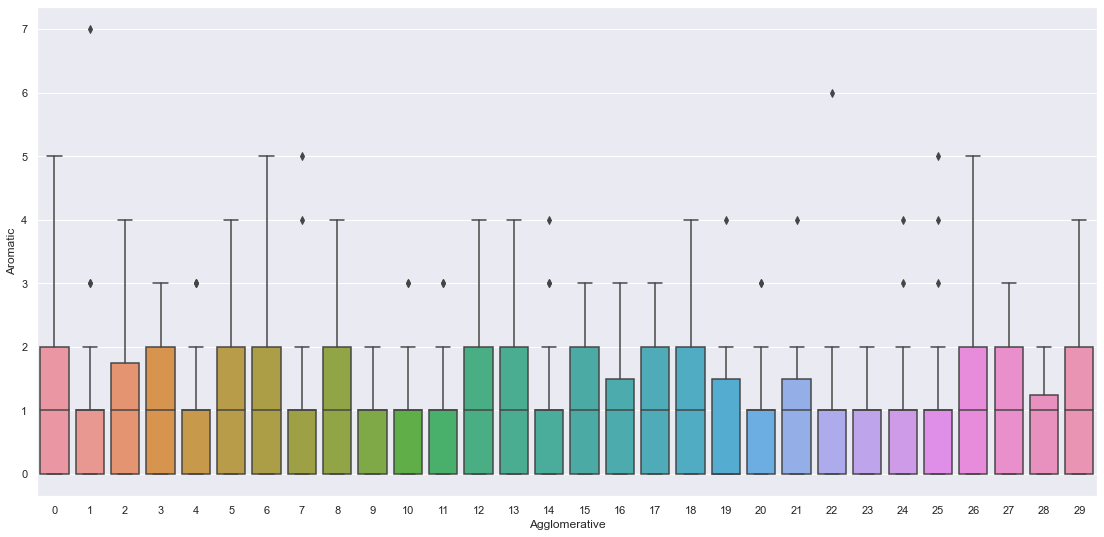

In [15]:
sns.boxplot(x=maccs['Agglomerative'], y=maccs['Aromatic'], data=maccs)
sns.set(rc={'figure.figsize':(19,9)})

In [16]:
maccs_lowlogp_dm = maccs[['fp49','fp139','fp84','fp151']].copy()
maccs_lowlogp = maccs[['fp49','fp139','fp84','fp151', 'logP', 'Hydrophobe']].copy()

res = 1 - pdist(maccs_lowlogp_dm, 'jaccard')
squareform(res)
maccs_distance = pd.DataFrame(squareform(res), index=maccs_lowlogp_dm.index, columns= maccs_lowlogp_dm.index)

model = AgglomerativeClustering(affinity='precomputed', n_clusters=20, linkage='complete').fit(maccs_distance)

model.labels_

array([ 0,  0,  0, ..., 16, 13,  9])

In [17]:
maccs_lowlogp['Agglomerative'] = model.labels_
# maccs_lowlogp['logP'] = maccs[['logP']].values
# maccs_lowlogp['Hydrophobe'] = maccs[['Hydrophobe']].values
maccs_lowlogp[500:700]

,fp49,fp139,fp84,fp151,logP,Hydrophobe,Agglomerative
500,0,0,0,0,-6.34,3,0
501,0,0,0,0,-4.07,2,0
502,0,0,0,0,-2.82,2,0
503,0,1,0,0,-3.48,2,0
504,0,0,0,1,-2.56,1,0
...,...,...,...,...,...,...,...
695,0,1,0,0,-3.85,7,0
696,0,0,0,1,-4.16,0,0
697,0,0,0,0,-3.11,3,0
698,0,0,0,0,-2.24,2,0


In [18]:
from sklearn.neighbors import NearestNeighbors

neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(maccs_fps) 
distances, indices = nbrs.kneighbors(maccs_fps)

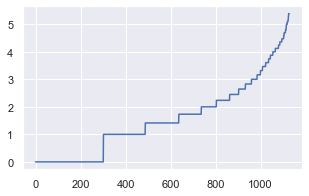

In [19]:
import matplotlib.pyplot as plt
import numpy as np

distances = np.sort(distances, axis = 0)
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show() 

In [20]:
from sklearn.cluster import DBSCAN

maccs_fps = maccs.iloc[:,3:515].values
dbscan = DBSCAN(eps=0.3, min_samples=2, algorithm='auto', metric='jaccard').fit(maccs_fps)
clus_set = set(dbscan.labels_)
unique = len(clus_set)
unique

labels = dbscan.labels_ 
labels[6:600]

array([ 1,  3, -1,  0,  4,  1,  1,  5,  1,  6,  1,  1,  7,  1,  1,  8,  9,
        5, 10,  1,  5,  5,  1,  1,  1,  9,  5, 11,  1,  1, 12, -1, -1,  1,
        1,  1,  5,  3,  1,  1,  5,  5, -1, 12,  1,  5,  1,  5,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  5, -1, -1,  5, 13, -1,  1, 14, 15,  3,  5,
        1,  1, 16,  1,  1, -1, 17, 12, -1,  1,  1,  1, 18, 15,  3,  5, 15,
        5,  1,  1,  1,  1,  1,  1, -1,  1,  3, 12,  0, 19,  1, 20, 15,  5,
        1,  5,  1, 15,  1,  1, 12,  5, 12, -1,  1,  1,  1,  1,  1, 15,  1,
        1,  5, 18, 12,  1, 12,  3,  5,  1,  1,  1,  1,  5,  1,  1,  1, 12,
       11, 12,  1,  5, -1,  5,  1,  5,  5,  1,  1,  1,  1,  1,  1, -1, 15,
        1, -1, 15,  1, 21,  5,  1,  1, 16, 15, 10,  1, -1,  3, -1, -1, 16,
       -1,  5,  1, -1,  1, 18,  5, 22, 15,  3, 12,  1,  3,  5,  1, 23,  5,
        1,  1,  5,  1,  1,  1,  1, 24, -1, -1, -1, 25, 26,  5,  1,  1,  1,
        1,  1,  1, 27,  1,  1, 12, -1, 15,  0,  1, 15,  1,  5,  5,  5, -1,
        1,  1, 15, 28,  5

In [38]:
from sklearn.manifold import TSNE

maccs_m = TSNE(learning_rate=50, perplexity=50)
maccs_tsne_fts = maccs_m.fit_transform(maccs_fps)
maccs_tsne_fts

array([[-31.461685 ,   3.1174994],
       [-27.291655 ,  16.389767 ],
       [-15.020648 ,  15.237034 ],
       ...,
       [ 12.008624 ,  -8.982944 ],
       [ -2.5314507,  -5.6082397],
       [  2.9282904,   2.6865711]], dtype=float32)

In [39]:
maccs_tsne_fts_df = pd.DataFrame(maccs_tsne_fts, columns=['x', 'y'])
maccs_tsne_fts_df['logP'] = maccs_logps
maccs_tsne_fts_df

,x,y,logP
0,-31.461685,3.117499,-0.770
1,-27.291655,16.389767,-3.300
2,-15.020648,15.237034,-2.060
3,-15.694482,24.722246,-7.870
4,-3.978626,-1.273129,-1.330
...,...,...,...
1123,-10.872528,3.107870,-1.710
1124,-27.355272,9.427633,0.106
1125,12.008624,-8.982944,-3.091
1126,-2.531451,-5.608240,-3.180


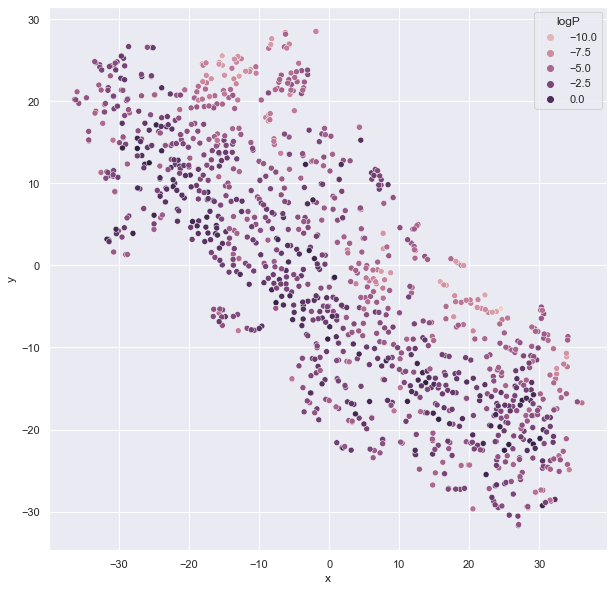

In [40]:
import seaborn as sns
from matplotlib import colors

sns.scatterplot(x='x', y='y', hue='logP', data=maccs_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [41]:
maccs_tsne_fts_df['Donor'] = maccs['Donor'].values
maccs_tsne_fts_df['Acceptor'] = maccs['Acceptor'].values
maccs_tsne_fts_df['Aromatic'] = maccs['Aromatic'].values
maccs_tsne_fts_df['Hydrophobe'] = maccs['Hydrophobe'].values
maccs_tsne_fts_df['LumpedHydrophobe'] = maccs['LumpedHydrophobe'].values
maccs_tsne_fts_df

,x,y,logP,Donor,Acceptor,Aromatic,Hydrophobe,LumpedHydrophobe
0,-31.461685,3.117499,-0.770,7,11,1,1,1
1,-27.291655,16.389767,-3.300,1,1,2,1,1
2,-15.020648,15.237034,-2.060,0,1,0,6,0
3,-15.694482,24.722246,-7.870,0,0,5,8,5
4,-3.978626,-1.273129,-1.330,0,0,1,0,1
...,...,...,...,...,...,...,...,...
1123,-10.872528,3.107870,-1.710,0,0,0,1,0
1124,-27.355272,9.427633,0.106,2,3,0,0,0
1125,12.008624,-8.982944,-3.091,0,2,0,3,0
1126,-2.531451,-5.608240,-3.180,0,0,0,2,1


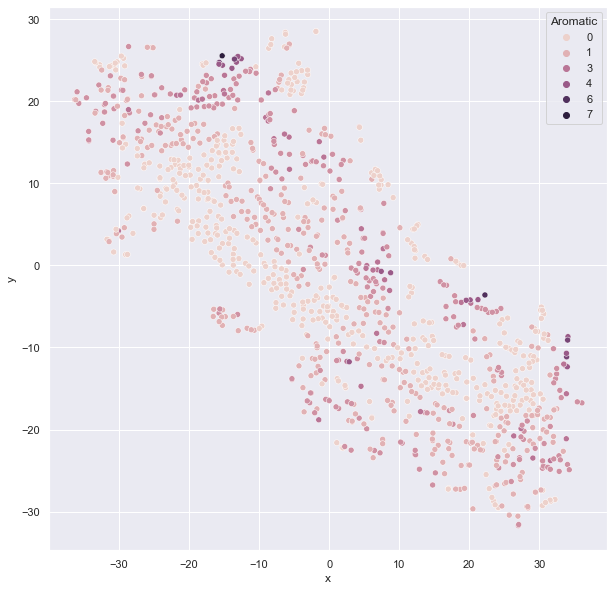

In [42]:
sns.scatterplot(x='x', y='y', hue='Aromatic', data=maccs_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

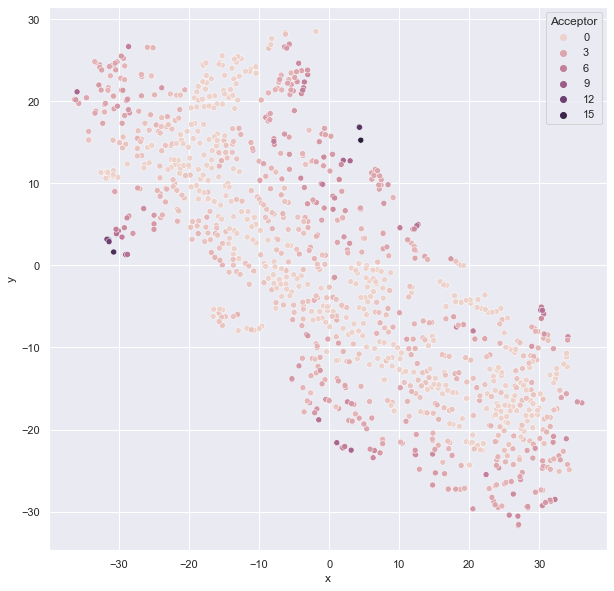

In [43]:
sns.scatterplot(x='x', y='y', hue='Acceptor', data=maccs_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

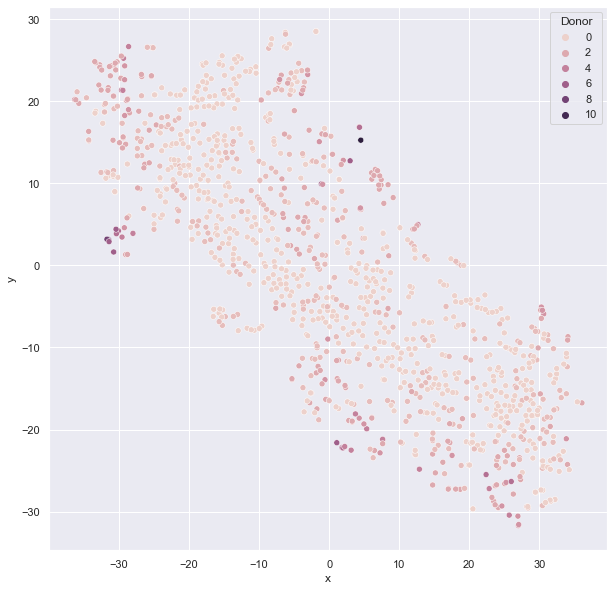

In [44]:
sns.scatterplot(x='x', y='y', hue='Donor', data=maccs_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

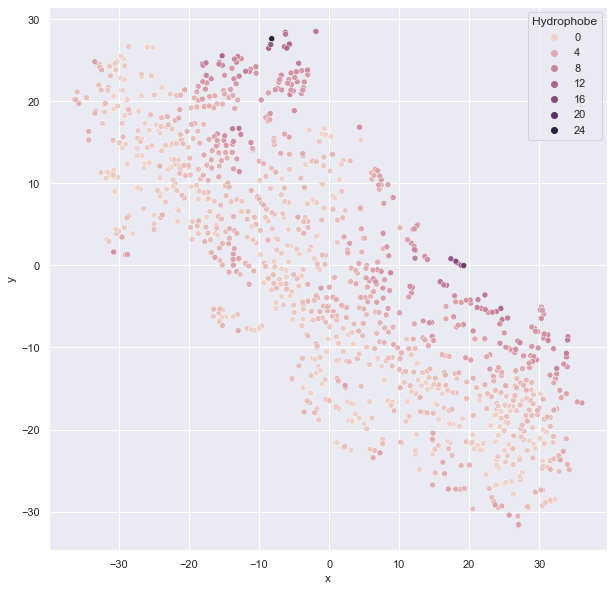

In [45]:
sns.scatterplot(x='x', y='y', hue='Hydrophobe', data=maccs_tsne_fts_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [46]:
maccs_m = TSNE(learning_rate=50)
maccs_lowlogp = maccs[['fp49','fp139','fp84','fp151']]
maccs_tsne_fts_low = maccs_m.fit_transform(maccs_lowlogp)
maccs_tsne_fts_low

array([[-9.737702  , 16.113384  ],
       [25.188522  ,  0.7628689 ],
       [-0.03401527, -7.1590204 ],
       ...,
       [ 0.29745117, -8.51566   ],
       [ 0.77488065, -7.204031  ],
       [ 0.7746223 , -7.2039356 ]], dtype=float32)

In [47]:
maccs_tsne_fts_low_df = pd.DataFrame(maccs_tsne_fts_low, columns=['x', 'y'])
maccs_tsne_fts_low_df['logP'] = maccs_logps
# maccs_tsne_fts_low_df['Donor'] = maccs2['Donor'].values
# maccs_tsne_fts_low_df['Acceptor'] = maccs2['Acceptor'].values
# maccs_tsne_fts_low_df['Aromatic'] = maccs2['Aromatic'].values
# maccs_tsne_fts_low_df['Hydrophobe'] = maccs2['Hydrophobe'].values
# maccs_tsne_fts_low_df['LumpedHydrophobe'] = maccs2['LumpedHydrophobe'].values
maccs_tsne_fts_low_df

,x,y,logP
0,-9.737702,16.113384,-0.770
1,25.188522,0.762869,-3.300
2,-0.034015,-7.159020,-2.060
3,0.771281,-7.202487,-7.870
4,0.781589,-7.206705,-1.330
...,...,...,...
1123,0.297451,-8.515660,-1.710
1124,24.309650,1.921687,0.106
1125,0.297451,-8.515660,-3.091
1126,0.774881,-7.204031,-3.180


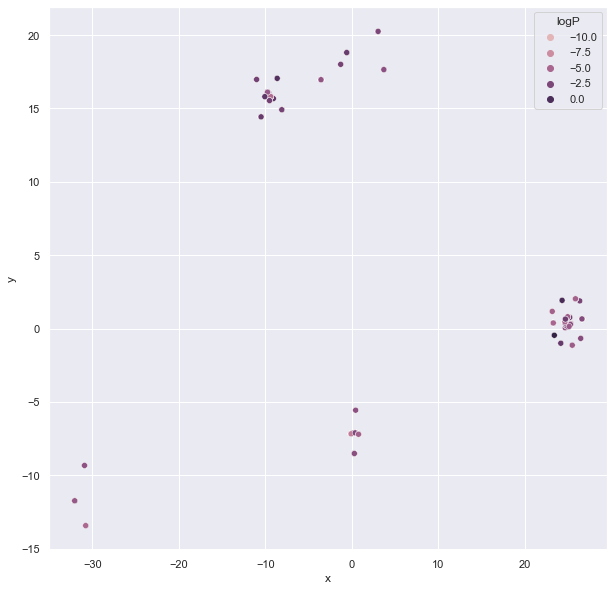

In [48]:
sns.scatterplot(x='x', y='y', hue='logP', data=maccs_tsne_fts_low_df)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [49]:
maccs_tsne_DB_df = pd.DataFrame(maccs_tsne_fts, columns=['x', 'y'])
maccs_tsne_DB_df['num'] = dbscan.labels_
maccs_tsne_DB_df

,x,y,num
0,-31.461685,3.117499,0
1,-27.291655,16.389767,-1
2,-15.020648,15.237034,-1
3,-15.694482,24.722246,1
4,-3.978626,-1.273129,-1
...,...,...,...
1123,-10.872528,3.107870,1
1124,-27.355272,9.427633,-1
1125,12.008624,-8.982944,9
1126,-2.531451,-5.608240,1


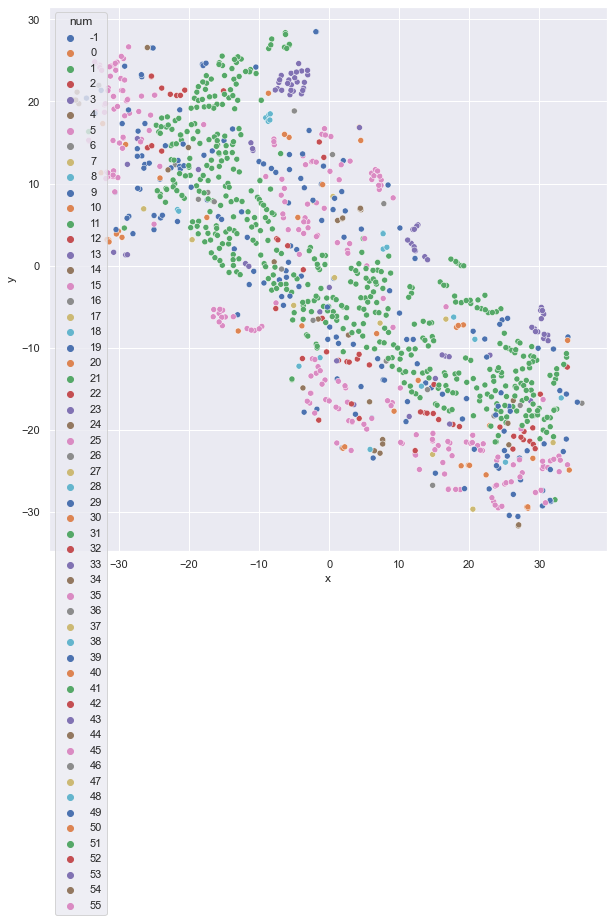

In [50]:
sns.scatterplot(x='x', y='y', hue='num', data=maccs_tsne_DB_df, palette="deep")#, legend=False)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [51]:
clustering = AgglomerativeClustering(n_clusters=9, linkage="ward").fit(maccs_tsne_fts)

maccs_tsne_AGG_df = pd.DataFrame(maccs_tsne_fts, columns=['x', 'y'])
maccs_tsne_AGG_df['num'] = clustering.labels_
maccs_tsne_AGG_df

,x,y,num
0,-31.461685,3.117499,0
1,-27.291655,16.389767,0
2,-15.020648,15.237034,4
3,-15.694482,24.722246,7
4,-3.978626,-1.273129,8
...,...,...,...
1123,-10.872528,3.107870,4
1124,-27.355272,9.427633,0
1125,12.008624,-8.982944,1
1126,-2.531451,-5.608240,8


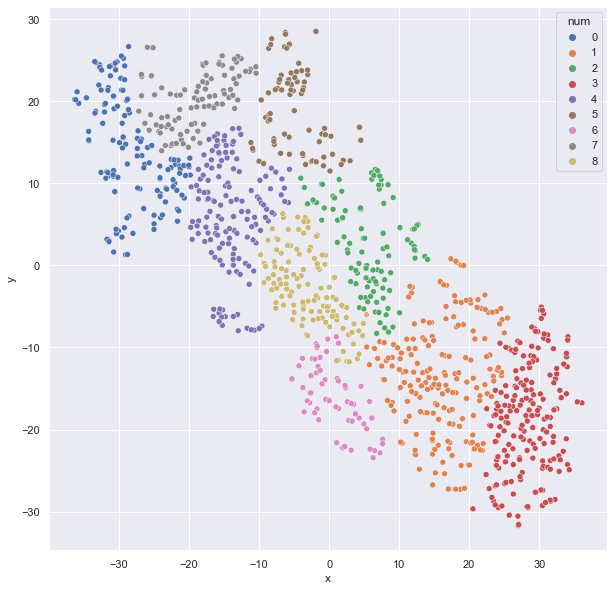

In [52]:
sns.scatterplot(x='x', y='y', hue='num', data=maccs_tsne_AGG_df, palette="deep")
plt.rcParams['figure.figsize'] = (10,10)
plt.show()